In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
import imaging_2021Paper as im
import behaviour_2021Paper as bh
import plotting_help_2021Paper as ph
import traveldirection_2021Paper as td

import matplotlib.gridspec as gridspec
from scipy import stats, ndimage
import copy

import warnings
warnings.filterwarnings('ignore')

## Static starfield vs progressive optic flow

In [7]:
# gain -2
reload(im)
names = [('2021031602',), ('2021031605',), ('2021031606', '2021031607'), ('2021032106',), ('2021032201',), 
         ('2021032202',),]
recss1 = im.get_recs(names, 'EIP', parent_folder='../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/',
    imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight, prairie2019=True, 
    firstwedge_cheng=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/2021_03_16/2021_03_16-002/2021_03_16_0002.abf
../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/2021_03_16/2021_03_16-005/2021_03_16_0005.abf
../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/2021_03_16/2021_03_16-006/2021_03_16_0006.abf
../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/2021_03_16/2021_03_16-007/2021_03_16_0007.abf
../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/2021_03_21/2021_03_21-006/2021_03_21_0006.abf
../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/2021_03_22/2021_03_22-001/2021_03_22_0001.abf
../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/2021_03_22/2021_03_22-002/2021_03_22_0002.abf


In [8]:
# gain -1.5
reload(im)
names = [
    ('2021041206',), 
    ('2021041212',), ('2021041214', '2021041215',), ('2021041309',), ('2021041312',), ('2021041313',),
]
recss2 = im.get_recs(names, 'EIP', parent_folder='../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/',
    imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight, prairie2019=True, 
    firstwedge_cheng=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/2021_04_12/2021_04_12-006/2021_04_12_0006.abf
../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/2021_04_12/2021_04_12-012/2021_04_12_0012.abf
../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/2021_04_12/2021_04_12-014/2021_04_12_0014.abf
../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/2021_04_12/2021_04_12-015/2021_04_12_0015.abf
../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/2021_04_13/2021_04_13-009/2021_04_13_0009.abf
../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/2021_04_13/2021_04_13-012/2021_04_13_0012.abf
../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/2021_04_13/2021_04_13-013/2021_04_13_0013.abf


In [9]:
recss = copy.copy(recss1)
recss.extend(recss2)

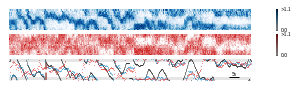

In [23]:
reload(td)
reload(ph)
rec_sample = recss2[0][0]
td.plot_2c_sample_trace_paper_20200320(rec_sample, axs=[], fig_size=(4.8,1.3), gs_width_ratios=[200,1],
                tlim=[77.8,190], cmaps=[plt.cm.Blues, ph.Reds], 
#                                        vlines=[47, 122, 93.5839, 96.2039],
                vlines=[95], ms_dot=.4, c_dot=ph.grey8, 
                vm=[0.,1.1], ms=.8, colors=[ph.blue, ph.dimred], bar_length=5, fs=5, )
# ph.save('Fig1e', exts=['pdf'])

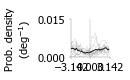

In [62]:
reload(td)
td.plot_hist_2angular_variables([recss,], fig_size=(.7,.7), polar=False, bin_num=30,
            label_sigs1=['eb.c1.phase', ], label_sigs2=['fb.c1.phase',], colors=['black'], 
            ms=2, ylim=[0,0.015], alpha_indi=0.25, lw_indi=0.3, lw=.8, filters=[],
            specific_stimid=1, shortest_stimid_dur_s=2, cut_start_stimid_s=10, cut_end_stimid_s=0,
            flightstop_detection=True, walkstand_detection=False, stim_visible=False, cancel_offset=False)
# ph.save('Fig1f-1', exts=['pdf'])

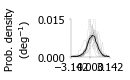

In [63]:
reload(td)
td.plot_hist_2angular_variables([recss,], fig_size=(.7,.7), polar=False, bin_num=30,
            label_sigs1=['eb.c1.phase', ], label_sigs2=['fb.c1.phase',], colors=['black'], 
            ms=2, ylim=[0,0.015], alpha_indi=0.25, lw_indi=0.3, lw=.8, filters=[],
            specific_stimid=2, shortest_stimid_dur_s=2, cut_start_stimid_s=10, cut_end_stimid_s=0,
            flightstop_detection=True, walkstand_detection=False, stim_visible=False, cancel_offset=False)
# ph.save('Fig1f-2', exts=['pdf'])

## Different expansion center of optic flows

In [35]:
reload(im)
names = [
    ('2020112105',), ('2020112201',), ('2020112202',), ('2020112205',), ('2020112206',), ('2020112207',), 
    ('2020112208',), ('2020112502',), ('2020112503',), ('2020112507',), ('2020112508',), ('2020112509',), 
    ('2020112510',), 
]
recss_2c_td = im.get_recs(names, 'EIP', parent_folder='../../../UAS_syt_GC7f__60D05_Gal4_72B_V55/',
                         imtype=(im.FanshapeBody, im.EllipsoidBody), bhtype=bh.Flight, prairie2019=True, 
                         firstwedge_cheng=True, seg_algo_fb='auto_seg', wedge_num=16, angle_offset=-133.125)

../../../60D05_Gal4-72B05_AD-VT055827_DBD-syt_GC7f/2020_11_21/2020_11_21-005/2020_11_21_0005.abf
../../../60D05_Gal4-72B05_AD-VT055827_DBD-syt_GC7f/2020_11_22/2020_11_22-001/2020_11_22_0001.abf
../../../60D05_Gal4-72B05_AD-VT055827_DBD-syt_GC7f/2020_11_22/2020_11_22-002/2020_11_22_0002.abf
../../../60D05_Gal4-72B05_AD-VT055827_DBD-syt_GC7f/2020_11_22/2020_11_22-005/2020_11_22_0005.abf
../../../60D05_Gal4-72B05_AD-VT055827_DBD-syt_GC7f/2020_11_22/2020_11_22-006/2020_11_22_0006.abf
../../../60D05_Gal4-72B05_AD-VT055827_DBD-syt_GC7f/2020_11_22/2020_11_22-007/2020_11_22_0007.abf
../../../60D05_Gal4-72B05_AD-VT055827_DBD-syt_GC7f/2020_11_22/2020_11_22-008/2020_11_22_0008.abf
../../../60D05_Gal4-72B05_AD-VT055827_DBD-syt_GC7f/2020_11_25/2020_11_25-002/2020_11_25_0002.abf
../../../60D05_Gal4-72B05_AD-VT055827_DBD-syt_GC7f/2020_11_25/2020_11_25-003/2020_11_25_0003.abf
../../../60D05_Gal4-72B05_AD-VT055827_DBD-syt_GC7f/2020_11_25/2020_11_25-007/2020_11_25_0007.abf
../../../60D05_Gal4-72B05_AD-V

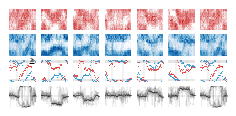

In [36]:
reload(td)
td.plot_2c_td_paper_20200320(recss_2c_td, recss_2c_td[5][0], ncol=7, stimids=[4,3,2,1,6,5,4], 
                             fig_size=(3.9,1.8), t_win_plot=[1,11,0], vlines=[4,8], t_win_stop=[-2,14], 
                             trial_id=[2,2,2,2,2,2,2], vm=[0,1.2],
                             cmaps=[ph.Reds, plt.cm.Blues], colors=[ph.dimred, ph.blue], 
                             ms=2, ms_phase_ave=.5, lw_dash=0.3, fs=7, alpha_indi=0.2)
# ph.save('Fig1g', exts=['pdf'])

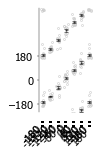

In [57]:
reload(td)
_ = td.barplot_dphase_ave_2ch_20210324(recss_2c_td, fig_size=(1, 1.9), locnums=[0,1], chnums=[1,1], stimids=[4,3,2,1,6,5,4],
                                t_before_end=-6.51, t_end=-4.1, t_win_stop=[-2,13], stopdetection=True,
                                t_win_interp=[-7,-3], flipsign_dphase=True, label_axeratio=-.2, fs=11, stim_method='dypos',
                                group_labels=['-180','-120','-60','0','60','120','180'],
                                print_indi=False, print_mean=False, stimid_N=10,
                                ms_indi=2, add180_phase1=False, add180_phase2=False,yticks=[-180,540], ylim=[-210,570],)

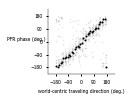

In [38]:
reload(td)
reload(fc)
td.plot_phase_and_td_unit(recss_2c_td, ax=ph.large_ax([1.2, 1.2]), stimids=[1,2,3,4,5,6], of_offsets=[0,-60,-120,180,120,60],
                          binnum=36, t_before_end=-6.1, t_end=-4.1, t_win_stop=[-2,13], fs=5, lim=[-235,235],
                          show_axes=['left', 'bottom'], lw_indi=.6, alpha_indi=.2, lw=2, ms_indi=1, ms=2, 
                          c_indi=ph.grey7, c='black')
# ph.save('Fig1i', exts=['pdf'])